In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
import audio_functions as af
import plot

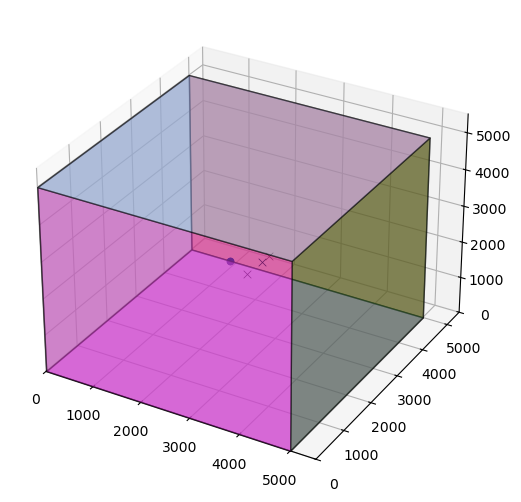

In [68]:
#Determino coeficiente de absorción 1 para simular campo libre y lo convierto en un material
abs_prom = pra.Material(1.0)

#Determino dimensiones y frecuencia de sampleo, dimensiones muy grandes para campo libre
room_dim = [5000, 5000, 5000]
fs = 48000

#Creo la habitación
room = pra.ShoeBox(room_dim, fs=fs, max_order=0, materials=abs_prom)

#Cargo el audio para poder asignarlo a la fuente
audio, _ =af.load_audio("audios_anecoicos/p336_001.wav")

#Agrego fuente a la sala
room.add_source([2500, 2250, 2502], signal=audio)

#Agrego array de mics a la sala
mic_array_loc = np.c_[[3000, 2000, 2501.2], [3000, 2500, 2501.2], [3000, 2750, 2501.2]]
room.add_microphone_array(mic_array_loc)

fig, ax = room.plot(mic_marker_size=30, source_marker_size=30)
ax.set_xlim([0,5500])
ax.set_ylim([0,5500])
ax.set_zlim([0,5500])

af.play_audio(audio,fs)

209644


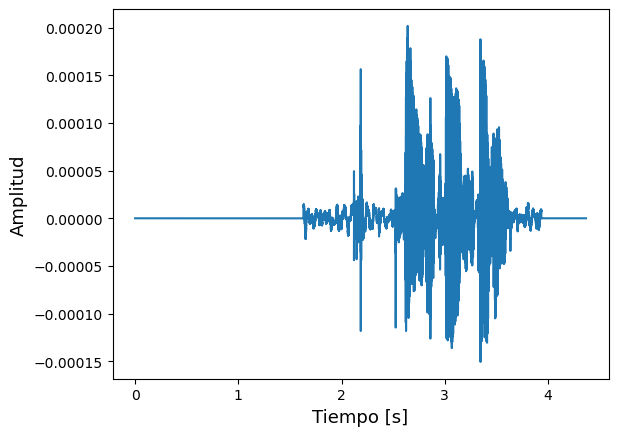

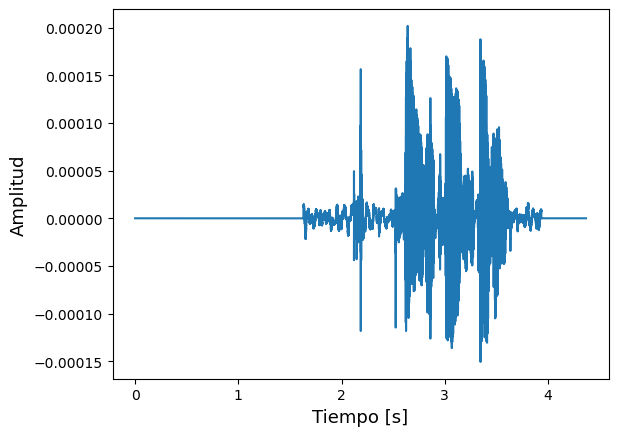

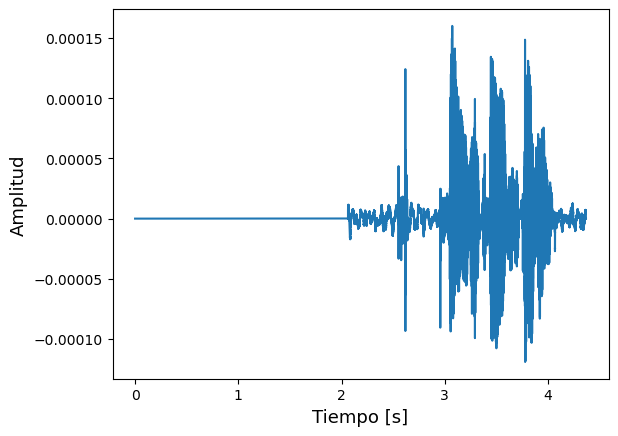

In [69]:
#Realizo la simulación
room.simulate()

#Obtengo cada audio grabado en la sala
grabaciones = room.mic_array.signals

mic_1 = grabaciones[0]
mic_2 = grabaciones[1]
mic_3 = grabaciones[2]

print(len(mic_1))

t_1 = af.generate_time_vector(len(mic_1)/fs, fs)
t_2 = af.generate_time_vector(len(mic_2)/fs, fs)
t_3 = af.generate_time_vector(len(mic_3)/fs, fs)

plot_1 = {"time vector":t_1, "signal":mic_1, "label":"Señal de Micrófono 1"}
plot_2 = {"time vector":t_2, "signal":mic_2, "label":"Señal de Micrófono 2"}
plot_3 = {"time vector":t_3, "signal":mic_3, "label":"Señal de Micrófono 3"}

plot.plot_signal(plot_1)
plot.plot_signal(plot_2)
plot.plot_signal(plot_3)



In [70]:
af.play_audio(mic_1, fs)

In [71]:
af.play_audio(mic_2, fs)

In [72]:
af.play_audio(mic_3, fs)

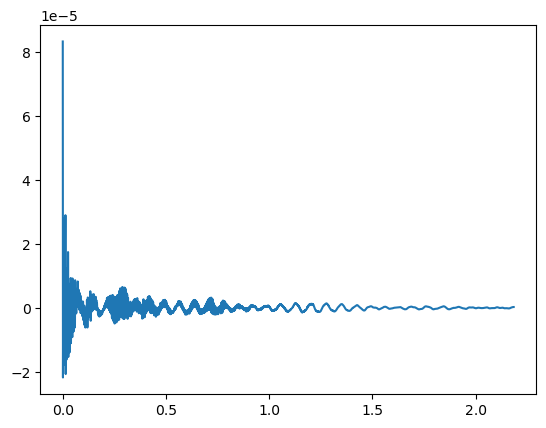

In [75]:
corr_12 = af.cross_corr(mic_1, mic_2, fs=fs)
corr_12 = corr_12[:len(corr_12)//2]

t_corr = af.generate_time_vector(len(corr_12)/fs, fs)

plt.plot(t_corr, corr_12)

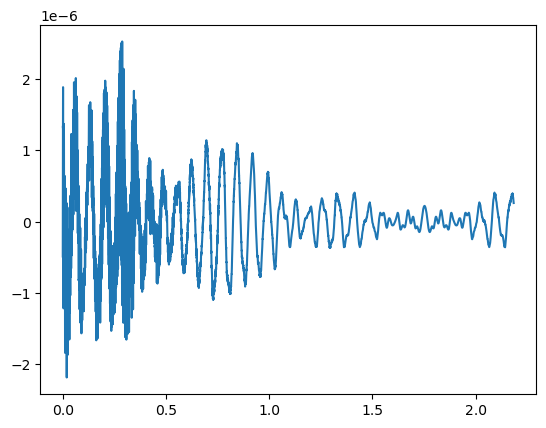

In [76]:
corr_13 = af.cross_corr(mic_1, mic_3, fs=fs)
corr_13 = corr_13[:len(corr_13)//2]

t_corr = af.generate_time_vector(len(corr_13)/fs, fs)

plt.plot(t_corr, corr_13)

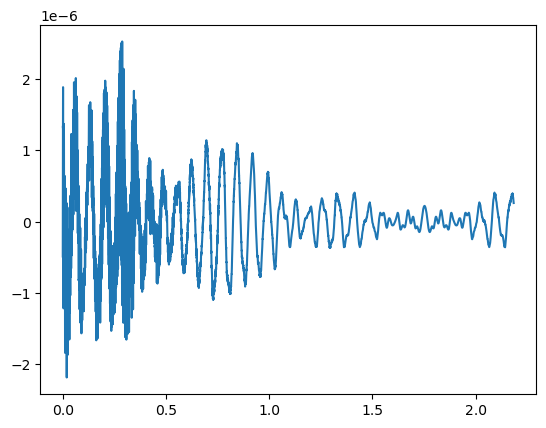

In [77]:
corr_23 = af.cross_corr(mic_2, mic_3, fs=fs)
corr_23 = corr_23[:len(corr_23)//2]

t_corr = af.generate_time_vector(len(corr_23)/fs, fs)

plt.plot(t_corr, corr_23)